In [1]:
import pandas as pd

from tqdm import tqdm

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split

from news_vec.utils import read_json_gz_lines

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
accs = pd.DataFrame(list(tqdm(read_json_gz_lines('../../data/clf-imp-acc.json/'))))

3400it [00:00, 221012.86it/s]


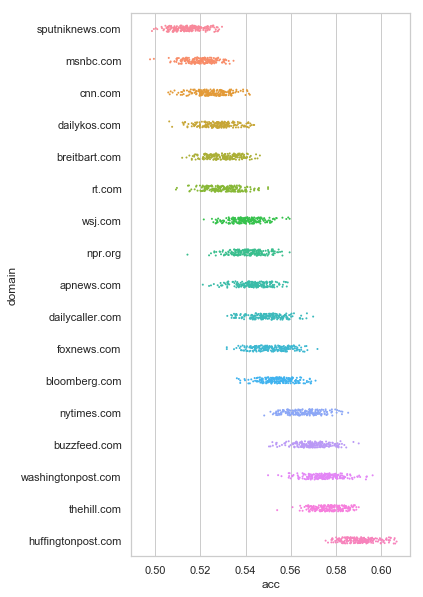

In [4]:
order = accs.groupby('domain').mean().sort_values('acc').index
plt.figure(figsize=(5,10))
sns.stripplot(x='acc', y='domain', data=accs, s=2, order=order)

In [5]:
articles = pd.DataFrame(list(tqdm(read_json_gz_lines('../../data/clf-articles.json/'))))

1130569it [00:17, 63607.84it/s]


In [6]:
min_count = articles.groupby('domain').size().min()

In [7]:
def imp_preds(domain):
    
    pdf = articles[articles.domain==domain].sample(min_count).copy()
    pdf['imp_rank'] = pdf.impressions.rank(pct=True)
    pdf['imp_high'] = pdf.imp_rank > 0.5
    
    rows_train, rows_test = train_test_split(pdf)
    
    X_train, y_train = rows_train.clf_tokens, rows_train.imp_high
    X_test, y_test = rows_test.clf_tokens, rows_test.imp_high
    
    tv = TfidfVectorizer(
        analyzer='word',
        tokenizer=lambda x: x,
        preprocessor=lambda x: x,
        ngram_range=(1,3),
        token_pattern=None,
    )
    
    X_train = tv.fit_transform(X_train)
    X_test = tv.transform(X_test)
    
    clf = LogisticRegression(solver='lbfgs')
    fit = clf.fit(X_train, y_train)
    
    ti = fit.classes_.tolist().index(True)
    
    preds = fit.predict_proba(X_test)
    
    rows_test = rows_test.copy()
    rows_test['p_high'] = preds[:,1]
    
    return rows_test

In [8]:
def plot_preds(domain):
    
    pdf = imp_preds(domain)
    
    for r in pdf.sort_values('p_high', ascending=False).head(20).itertuples():
        print(r.p_high, ' '.join(r.clf_tokens))
        
    print('\n')
    for r in pdf.sort_values('p_high', ascending=True).head(20).itertuples():
        print(r.p_high, ' '.join(r.clf_tokens))
    
    sns.jointplot(y='p_high', x='imp_rank', data=pdf, s=1)
    plt.show()

0.9132557129827763 trump s authoritarian administration
0.9101830714496116 house chaplain who prayed about gop tax bill fired by paul ryan
0.8896772415668327 giuliani says mueller ca nt talk to trump until trump hears more about fbi source
0.8874337147882632 jeff sessions says trump s criticism was hurtful but he wo nt resign
0.8784063352960327 former trump adviser michael flynn charged in special counsel s russia investigation
0.8779274289392192 donald trump jr says democrats are more like nazis than republicans are
0.8758867378036939 russian state media gets access to white house meeting while us press kept out
0.8716978713534965 irish government says trump s ireland visit has been canceled
0.8715284020391653 jake tapper flings refugee contradiction at ivanka trump s pro strike tweet
0.8701199968889054 a new poll shows the gop is more trump s party than paul ryan s
0.8683084140847608 house conservatives were plotting against paul ryan then came trump s surprise
0.867852890192729 repu

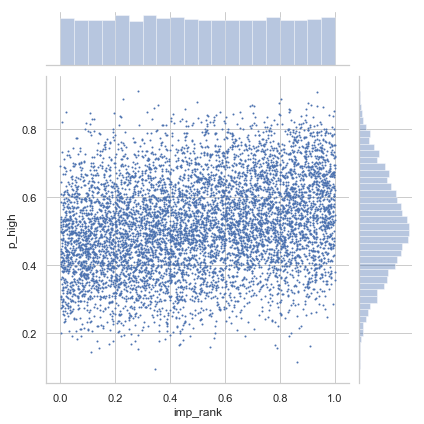

In [9]:
plot_preds('huffingtonpost.com')

0.8631757042757204 lago than mueller has on russia probe
0.850948669915363 mueller asked witnesses about cohen involvement in trump campaign
0.8334765120037236 clinton aide slams fbi director for not disclosing trump s alleged ties to russia
0.8324309005567375 trump blaming kushner for mueller investigation
0.8305606865571731 white house rejects sessions recusal calls
0.830463216651963 i wish trump treated putin like he treats cnn
0.8295023629040513 trump accuser calls for trump to share footage from day she alleges he forcibly kissed her
0.8290968069487568 conway has been counseled after ivanka trump remarks
0.8289329973858293 trump asked comey when he would dispel investigation rumors
0.8245839258606954 bannon met with several foreign leaders after leaving white house
0.8160478888322973 trump names ty cobb as white house special counsel
0.8137416981896458 trump hires another lawyer for russia probe
0.8119707854007063 philadelphia mayor blasts trump as fragile egomaniac after he disin

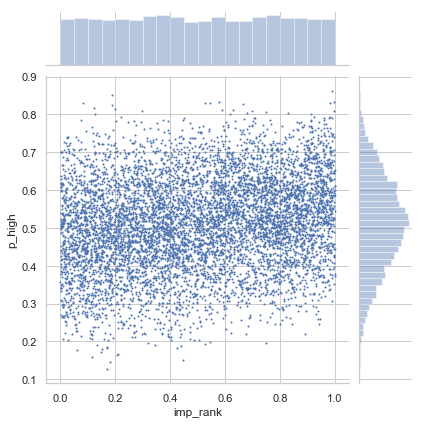

In [10]:
plot_preds('thehill.com')

0.9297059842780833 trump channels old hickory
0.896399808077623 did the president order mueller to be fired fake news trump says
0.886761711342488 he s a gop immigration hard liner so why is he trailing in trump country
0.8673546639493761 republicans worry that white house disarray is undermining trump
0.8673198553883203 trump says he s sending the national guard on the border many are nt sure why
0.8642178891126532 to allies chagrin trump swerves left
0.8632840800616631 trump so far is more farce than tragedy
0.8624417236973472 shopping becomes a political act in the trump era
0.8582452580238564 trump wants to aid only america s friends if only it were that easy
0.8535207261716578 trump sticks a fork in comey
0.8512281602140069 trump is wrong to skip the white house correspondents dinner
0.8500700113587488 enough trump bashing democrats
0.843981209619328 deep in trump country a big stake in health care
0.8388561631204897 the nicknames of trump s adversaries
0.8388403874878363 times re

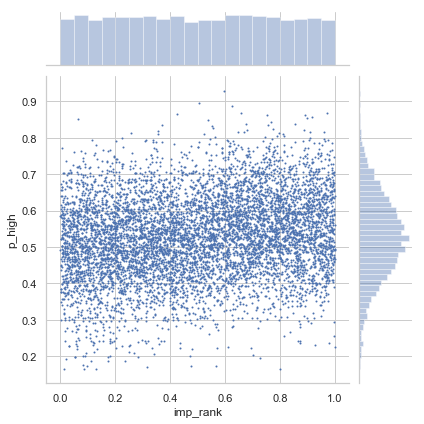

In [11]:
plot_preds('nytimes.com')

0.8796354617508313 black pro trump conservative begins pro trump empire
0.8744768397292842 boris johnson praised trump on trump s favourite tv show
0.8655086240311273 trump s tweets are still snagging the justice department s travel ban defense
0.8625027723355327 trump uses facebook exec tweet to call media fake news
0.8621603165845897 the justice department just argued against gay rights in a major federal case
0.8574485641595395 a former russian spy worked on a trump moscow deal while trump was running for president
0.8499112451890646 trump s press conference was a rallying cry for the pro trump media
0.8444567826874473 trump attacked the media for running fake news during a combative press conference
0.8422077021594598 how russians tried to infiltrate the trump campaign
0.8411889798094525 trump s lawyer the says who guy is now being investigated in the russia probe
0.8382848989032302 a foreign policy expert says calling out trump s hate speech hurt her career
0.835344536751035 the j

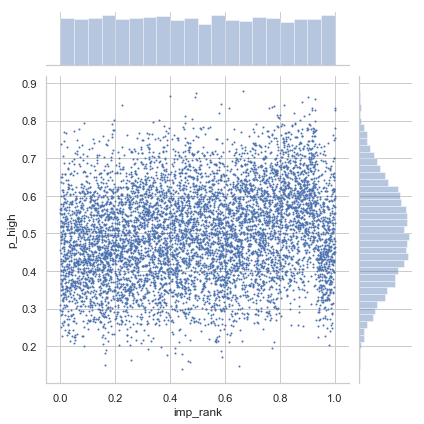

In [12]:
plot_preds('buzzfeed.com')

0.971881743064384 the blundering trump is
0.8890922266561073 trump s christmas sweater
0.8702740443856248 trump is kowtowing to the kremlin again why
0.8639790730464353 congress must vote on trump s war trump himself said so in #
0.8618801108834905 a bored trump beefs with bloomberg news
0.8591514961744238 the unpopular trump is shrinking the gop
0.8581640622818676 north korea taps gop analysts to better understand trump and his messages
0.8568222961152799 trump has americans frightened about north korea
0.8552654891532947 trump has spent # percent of his presidency at trump owned or
0.8544295727432769 trump would cut more in federal infrastructure spending than he proposes to add democrats say
0.8541863968663334 white house stabilizers gone trump calling his own shots
0.853725506577846 why some inside the white house see trump s media feud as winning
0.8517131804478763 president trump has made more than # false or misleading claims
0.8503708070927103 trump s latest empty threat on nor

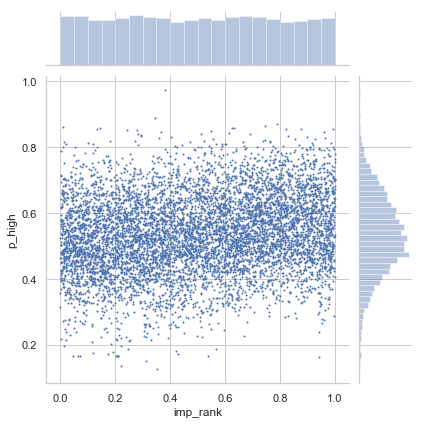

In [13]:
plot_preds('washingtonpost.com')